# 情報数学2 回帰分析2  
## 最小二乗法の一般化

次の$(x,y)$の組について、$p=2$ (2次関数) $𝑦=𝛼_0+𝛼_1 𝑥^1+𝛼_2 𝑥^2$ にあてはめなさい。また残差平方和RSSと決定係数$R^2$を求めなさい。

| | | |
|-|-|-|
|x|-0.98|1.00|2.02|3.03|4.00|
|y|2.44 |-1.51|-0.47|2.54|7.52|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.array([[-0.98, 2.44],
                 [1.00,-1.51],
                 [2.02,-0.47],
                 [3.03,2.54],
                 [4.00,7.52]
                ])
df = pd.DataFrame(data)
df.columns = ['x','y']
df.describe()

,x,y
count,5.000000,5.0000
mean,1.814000,2.1040
std,1.921505,3.5115
min,-0.980000,-1.5100
25%,1.000000,-0.4700
50%,2.020000,2.4400
75%,3.030000,2.5400
max,4.000000,7.5200


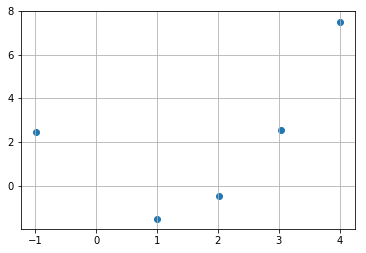

In [3]:
plt.scatter(data[:,0], data[:,1])
plt.grid()

In [4]:
#正規方程式の要素を求める
#変数の初期化
left = [[0 for i in range(3)] for i in range(3)] #要素数3の2次元配列を作成
right = [0 for i in range(3)] #要素数3の1次元配列を作成

#左辺係数行列を求める
for i in range(len(left)): #係数行列行数
    for j in range(len(left)): #係数行列列数
        for k in data[:,0]: #利用データ(x)
            left[i][j] += k**(i+j)
print(left)

#右辺を求める
for i in range(len(right)): #係数行列行数
     for j in df.itertuples(): #利用データ(x,y)   
        right[i] += j[1]**i * j[2] #データフレームの要素番号は1から
print(right)

[[5.0, 9.07, 31.2217], [9.07, 31.2217, 100.11934299999999], [31.2217, 100.11934299999999, 358.86095713]]
[10.52, 32.925599999999996, 142.555074]


$\left(
\begin{matrix} 
5.0 & 9.07 & 31.2217 \\ 
9.07 & 31.2217 & 100.119\\
31.2217 & 100.119 & 358.861
\end{matrix} 
\right)$

$\left(
\begin{matrix} 
10.52\\ 32.9256\\ 142.5551
\end{matrix} 
\right)$

In [5]:
from numpy.linalg import solve
value = solve(left, right)
print(value)

[-0.50551541 -2.02615941  1.00650646]


$\left(
\begin{matrix} 
-0.5055\\ -2.0262\\  1.0065
\end{matrix} 
\right)$

$y(x) = -0.5055 -2.0262x + 1.0065x^2$

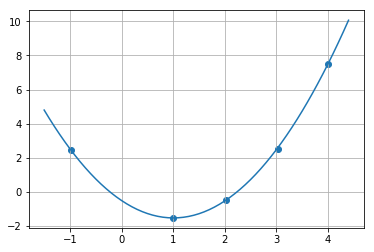

In [6]:
#回帰曲線を描画
plt.scatter(data[:,0],data[:,1])
plt.grid()
x = np.arange(-1.5, 4.5, 0.1)
y = value[0] + value[1] * x + value[2] * x**2 
plt.plot(x, y)

In [7]:
r2 = 0 #決定係数
rss = 0 #残差平方和
sum = 0 #偏差平方和
#RSS(残差平方和)を求める
for i, j in zip(data[:, 0], data[:,1]):
    rss += (j - value[0] - value[1] * i - value[2] * i**2)**2
print(rss)

#偏差平方和を求める
for i in data[:,1]:
    sum += (i - np.mean(data[:,1]))**2
print(sum)

#決定係数を求める
r2 = 1 - rss / sum
print(r2)

0.004532790295275297
49.32252
0.9999080989719245


RSS = 0.004532790295275297  
$R^2$ = 0.9999080989719245

次の$(x,y)$の組について、$p=3$ (3次関数) $𝑦=𝛼_0+𝛼_1 𝑥^1+𝛼_2 𝑥^2+𝛼_3 𝑥^3$にあてはめなさい。また残差平方和RSSと決定係数を求めなさい。

In [8]:
#正規方程式の要素を求める
#変数の初期化
left3 = [[0 for i in range(4)] for i in range(4)] #要素数4の2次元配列を作成
right3 = [0 for i in range(4)] #要素数4の2次元配列を作成

#左辺係数行列を求める
for i in range(len(left3)): #係数行列行数
    for j in range(len(left3)): #係数行列列数
        for k in data[:,0]: #利用データ(x)
            left3[i][j] += k**(i+j)
print(left3)

#右辺を求める
for i in range(len(right3)): #係数行列行数
     for j in df.itertuples(): #利用データ(x,y)   
        right3[i] += j[1]**i * j[2] #データフレームの要素番号は1から
print(right3)

[[5.0, 9.07, 31.2217, 100.11934299999999], [9.07, 31.2217, 100.11934299999999, 358.86095713], [31.2217, 100.11934299999999, 358.86095713, 1313.1238429807], [100.11934299999999, 358.86095713, 1313.1238429807, 4939.6713218074565]]
[10.52, 32.925599999999996, 142.555074, 544.25760234]


In [9]:
from numpy.linalg import solve
value3 = solve(left3, right3)
print(value3)

[-0.45795035 -2.01308811  0.96936625  0.00802241]


$f_3(x) = -0.45795035 -2.01308811 x + 0.96936625 x^2 + 0.00802241 x^3$

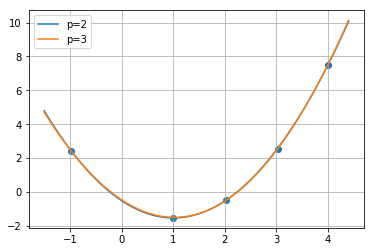

In [10]:
#回帰曲線を描画
plt.scatter(data[:,0],data[:,1])
plt.grid()
x = np.arange(-1.5, 4.5, 0.1)
y3 = value3[0] + value3[1] * x + value3[2] * x**2 +value3[3] * x ** 3
plt.plot(x,y, label = 'p=2') #p=2の時
plt.plot(x, y3, label = 'p=3') #p=3の時
plt.legend()

In [11]:
r23 = 0 #決定係数
rss3 = 0 #残差平方和
sum3 = 0 #偏差平方和
#RSS(残差平方和)を求める
for i, j in zip(data[:, 0], data[:,1]):
    rss3 += (j - value3[0] - value3[1] * i - value3[2] * i**2 - value3[3] * i**3 )**2
print(rss3)

#偏差平方和を求める
for i in data[:,1]:
    sum3 += (i - np.mean(data[:,1]))**2
print(sum3)

#決定係数を求める
r23 = 1 - rss3 / sum3
print(r23)

0.0020350857799719636
49.32252
0.9999587392172993


$RSS = 0.0020350857799719636$  
$R^2 = 0.9999587392172993$